In [1]:
import pandas as pd 
import numpy as np 
style.use('seaborn')
import matplotlib.pyplot as plt 
from matplotlib import style 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier


In [2]:
df = pd.read_csv('fake_news_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [3]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.text,df.label,random_state=2, test_size=0.2)

In [6]:
tf1 = TfidfVectorizer(stop_words='english',max_df=0.7)
tf_train = tf1.fit_transform(X_train)
tf_test = tf1.transform(X_test)

## Visualization

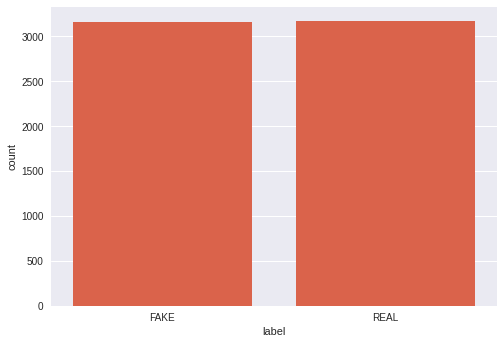

In [25]:
import seaborn as sns
sns.countplot(x='label',data = df,color='#f25333')

---

# PCA

In [7]:
pca = PassiveAggressiveClassifier(max_iter=700)

In [8]:
pca.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=700)

In [9]:
y_pred = pca.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  94.1594317284925 %


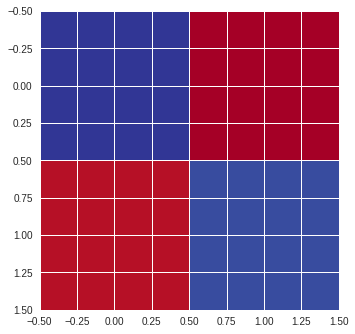

In [10]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu',interpolation='nearest')
plt.show()

# RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=10)

In [13]:
model.fit(tf_train,y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
y_pred = model.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  85.79321231254933 %


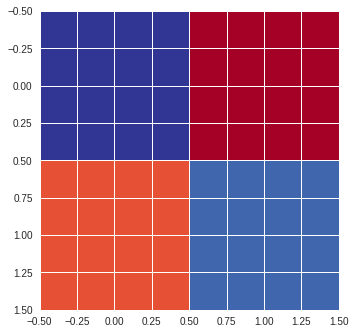

In [15]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu',interpolation='nearest')
plt.show()

# SVM

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()
model.fit(tf_train,y_train)

SVC()

In [18]:
y_pred = model.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  92.65982636148382 %


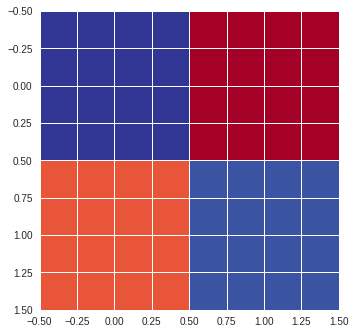

In [19]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu',interpolation='nearest')
plt.show()

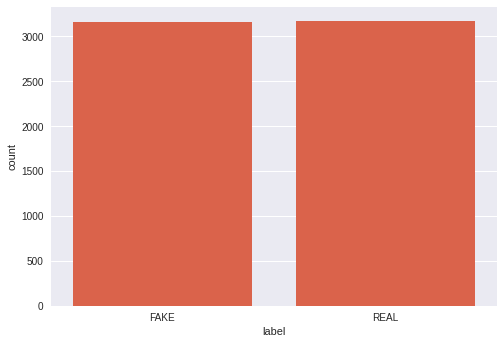

In [24]:
import seaborn as sns
sns.countplot(x='label',data = df,color='#f25333')